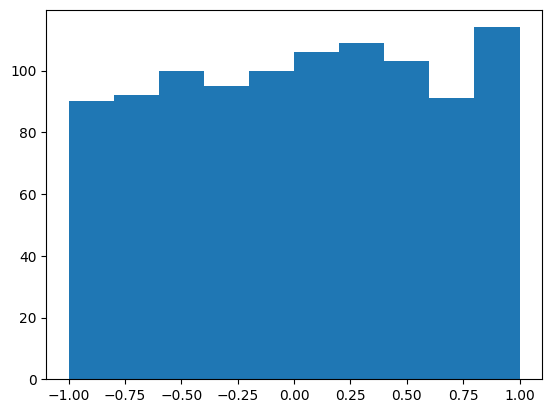

In [1]:
from samplers import get_data_sampler, UniformSampler

set_of_xs = []
data_sampler = UniformSampler(1)
data = data_sampler.sample_xs(1, 1000, 1).squeeze().squeeze()
import matplotlib.pyplot as plt

plt.hist(data)
plt.show()

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

torch.Size([100000, 10, 1])
tensor([[ 0.0342,  0.4776,  0.2105],
        [-0.6187, -0.4442, -0.0578]])
torch.Size([100000, 10])
torch.Size([1000000])


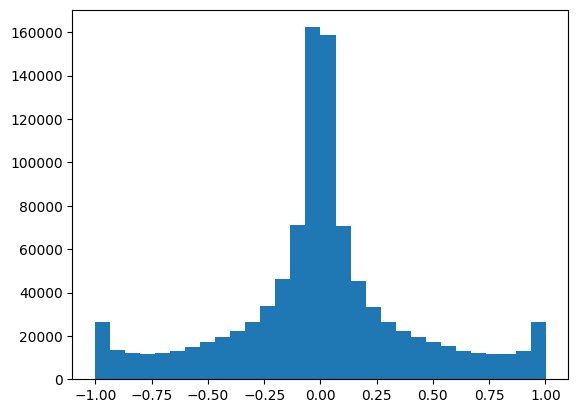

In [3]:
from tasks import PolynomialSharedRoots, ChebyshevKernelLinearRegression
data =  data_sampler.sample_xs(10, 100000, 1)
task = PolynomialSharedRoots(n_dims=1, batch_size=100000, perturbation=0.5, basis_dim=1, degree=5)
#task = ChebyshevKernelLinearRegression(n_dims=1, batch_size=100000, basis_dim=5,lowest_degree=5, highest_degree=5)
print(data.shape)
ys = task.evaluate(data).squeeze()
print(ys[:2,:3])
print(ys.shape)
ys = ys.reshape(-1)
print(ys.shape)
plt.hist(ys, bins=30)
plt.show()

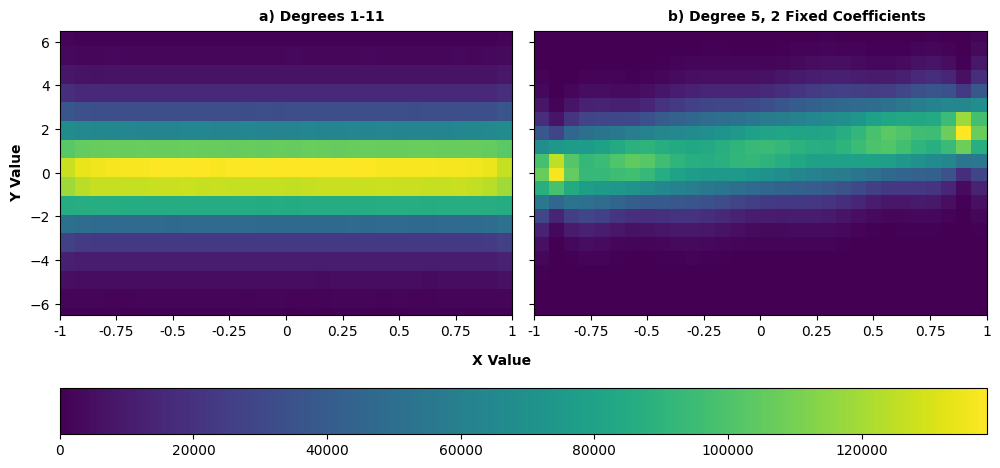

In [56]:
import numpy as np
from npeet import entropy_estimators as ee
from matplotlib.ticker import FuncFormatter
def mutual_information(data, ys):
    # Sort ys according to data
    return ee.mi(data, ys)
from tasks import get_task_sampler, ChebyshevKernelLinearRegression
data =  data_sampler.sample_xs(20, 1000000, 1)
#task = PolynomialSharedRoots(n_dims=1, batch_size=100000, basis_dim=1, degree=5, perturbation=0.1)
import torch

# Function to format the ticks
def two_sig_figs(x, pos):
    return f'{x:.2g}'

task_all = ChebyshevKernelLinearRegression(n_dims=1, batch_size=1000000, basis_dim=11,lowest_degree=1, highest_degree=11, fixed_coeffs=0, scale=1.0, different_degrees=True)
task = ChebyshevKernelLinearRegression(n_dims=1, batch_size=1000000, basis_dim=5,lowest_degree=5, highest_degree=5, fixed_coeffs=2, scale=1.0)
ys = task.evaluate(data).squeeze()
ys_all = task_all.evaluate(data).squeeze()
ys_all = ys_all.reshape(-1)
ys_all = ys_all.numpy()
ys = ys.reshape(-1)
data = data.reshape(-1)
data = data.numpy()
ys = ys.numpy()
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

# Formatter to show two significant figures
formatter = FuncFormatter(two_sig_figs)
axs[0].xaxis.set_major_formatter(formatter)
axs[1].xaxis.set_major_formatter(formatter)


h1= axs[0].hist2d(data,ys_all, bins=[30,30])
h2 = axs[1].hist2d(data,ys, bins=[30,30])
# Add a shared colorbar horizontally

descriptions = ["a) Degrees 1-11", "b) Degree 5, 2 Fixed Coefficients"]

left = axs[0].get_position().x0
right = axs[1].get_position().x1
center = (left + right) / 2

axs[0].annotate(descriptions[0], xy=(0.5, 1.05), xycoords='axes fraction', ha='center', va='center', fontweight='bold')
axs[1].annotate(descriptions[1], xy=(0.5, 1.05), xycoords='axes fraction', ha='center', va='center', fontweight='bold')

plt.tight_layout()
# Set shared labels
axs[0].set_ylabel('Y Value', fontweight='bold')
fig.text(0.5, 0.25, 'X Value', ha='center', fontweight='bold')
#plt.tight_layout()
cbar = fig.colorbar(h1[3], ax=axs, orientation='horizontal')
plt.subplots_adjust(bottom=0.35)  # Adjust padding
plt.xlim([-1, 1])
plt.ylim((-6.5, 6.5))


plt.savefig("hist2d.png")
plt.show()

torch.Size([100000, 20, 1])


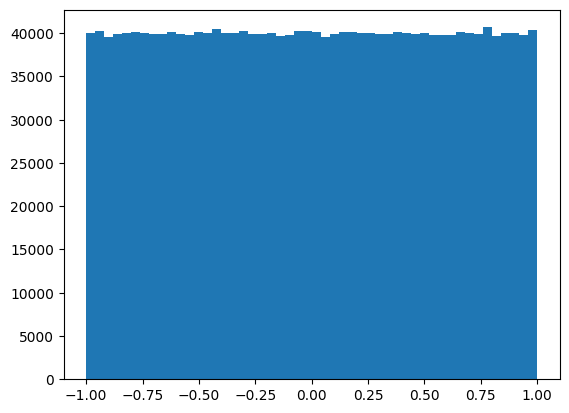

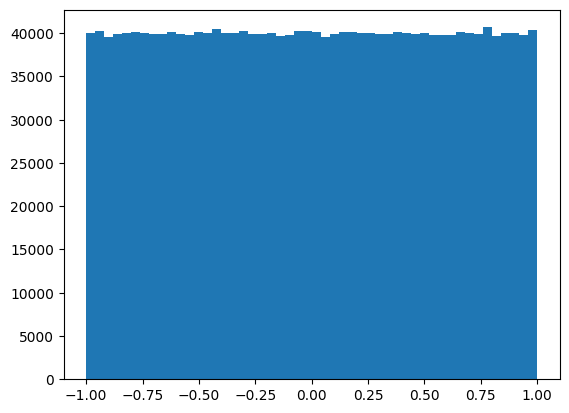

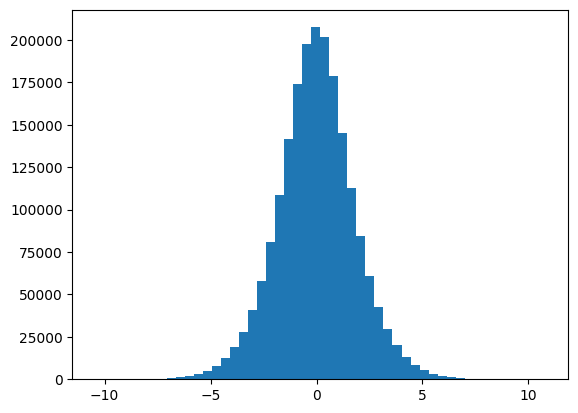

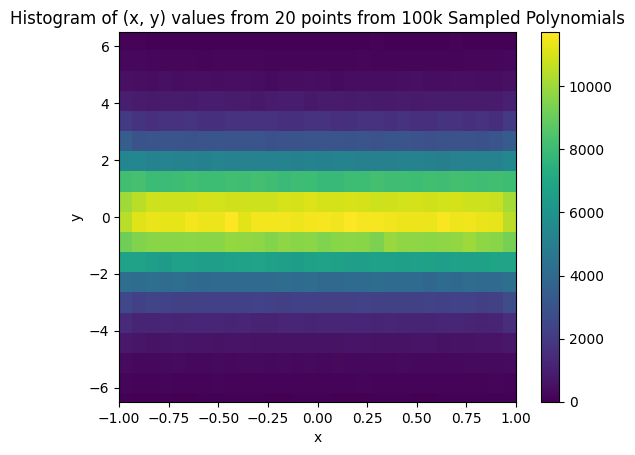

INFORMATION GAIN:  0.007647474911554135
ENTROPY OF Y:  1.3180585345566775


In [16]:
import numpy as np
from npeet import entropy_estimators as ee
def mutual_information(data, ys):
    # Sort ys according to data
    return ee.mi(data, ys)
from tasks import get_task_sampler, ChebyshevKernelLinearRegression
data =  data_sampler.sample_xs(20, 100000, 1)
#task = PolynomialSharedRoots(n_dims=1, batch_size=100000, basis_dim=1, degree=5, perturbation=0.1)
import torch
task = ChebyshevKernelLinearRegression(n_dims=1, batch_size=100000, basis_dim=11,lowest_degree=1, highest_degree=11, fixed_coeffs=0, scale=1.0, different_degrees=True)
print(data.shape)
ys = task.evaluate(data).squeeze()
ys = ys.reshape(-1)
data = data.reshape(-1)
plt.hist(data, bins=50)
plt.show()
data = data.numpy()
ys = ys.numpy()
plt.hist(data, bins=50)
plt.show()
plt.hist(ys, bins=50)
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111)
counts,xedges,yedges,img = ax.hist2d(data,ys, bins=[30,30])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Histogram of (x, y) values from 20 points from 100k Sampled Polynomials")
plt.xlim([-1, 1])
plt.ylim((-6.5, 6.5))
plt.colorbar(img)
plt.show()
print("INFORMATION GAIN: ", mutual_information(data, ys))
print("ENTROPY OF Y: ", ee.entropy(ys[:, None]))